<a href="https://colab.research.google.com/github/anik5099/Titanic-ML/blob/main/Titanic_dataset_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing dataset from csv file

In [26]:
dataset = pd.read_csv('/content/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking number of missing values in each column

In [27]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As most of the values are missing in Cabin column, it's better to drop the column

In [28]:
dataset = dataset.drop(columns='Cabin', axis=1)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Filling missing values of Age column

In [29]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

In [30]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Filling missing values of Embarked column

In [44]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [45]:
dataset['Embarked'].unique() #checking if filled

array(['S', 'C', 'Q'], dtype=object)

In [46]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Statistical Analysis

In [47]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Plotting Data to visualize

In [49]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

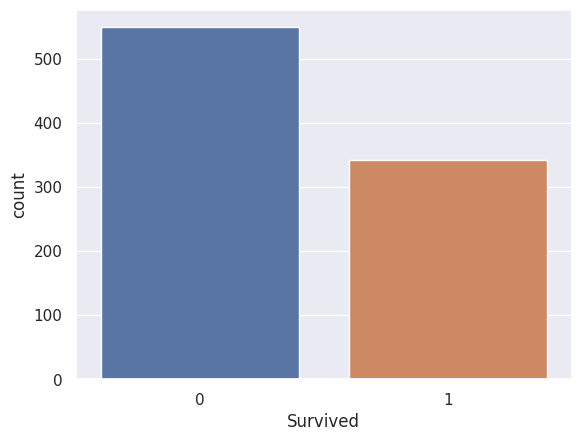

In [54]:
sns.countplot(x='Survived', data=dataset)

<Axes: xlabel='Sex', ylabel='count'>

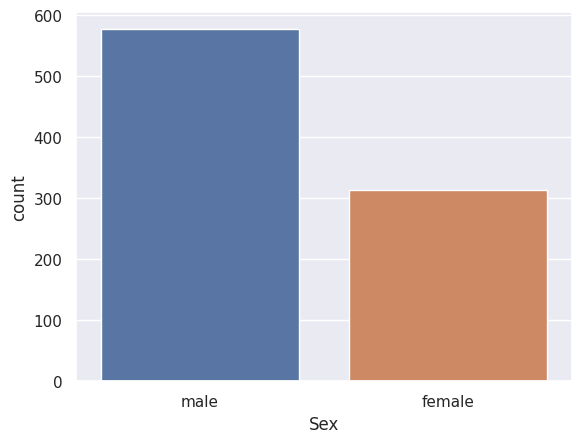

In [55]:
sns.countplot(x='Sex', data=dataset)

<Axes: xlabel='Age', ylabel='count'>

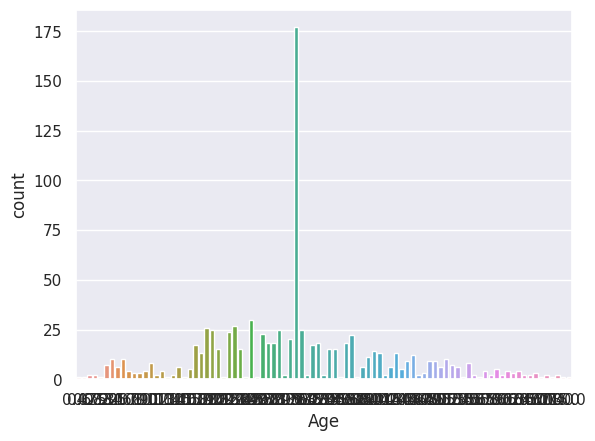

In [56]:
sns.countplot(x='Age', data=dataset)

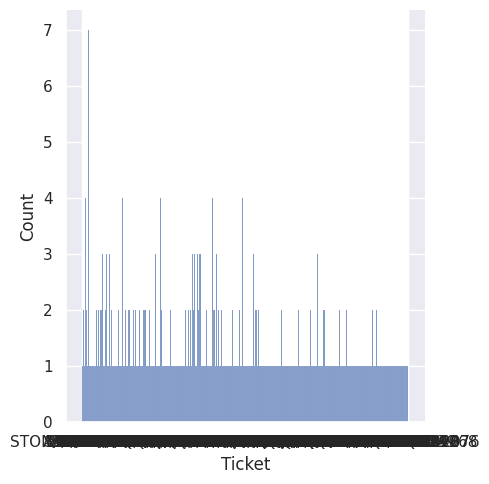

In [68]:
sns.displot(x='Ticket', data=dataset)

<Axes: xlabel='SibSp', ylabel='count'>

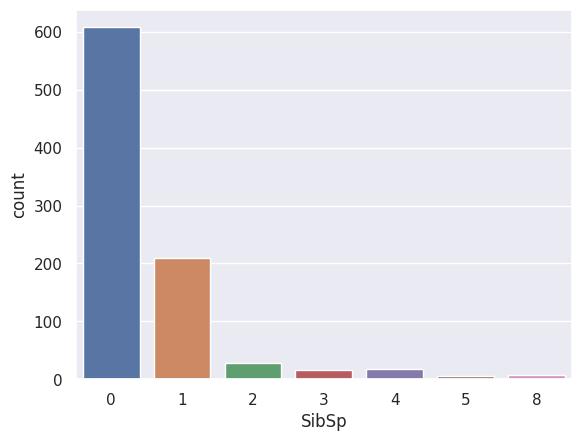

In [59]:
sns.countplot(x='SibSp', data=dataset)

<Axes: xlabel='Parch', ylabel='count'>

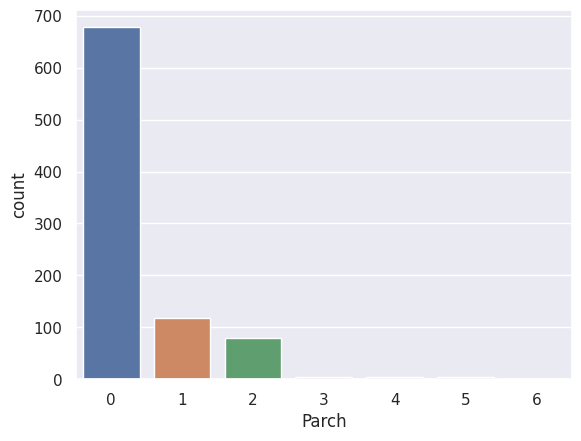

In [60]:
sns.countplot(x='Parch', data=dataset)

<Axes: xlabel='Pclass', ylabel='count'>

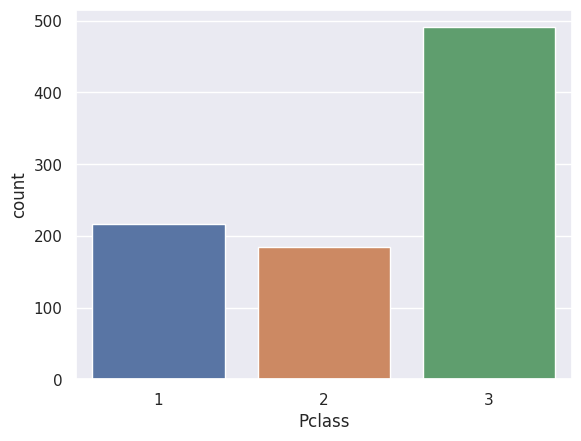

In [67]:
sns.countplot(x='Pclass', data=dataset)

<Axes: xlabel='Sex', ylabel='count'>

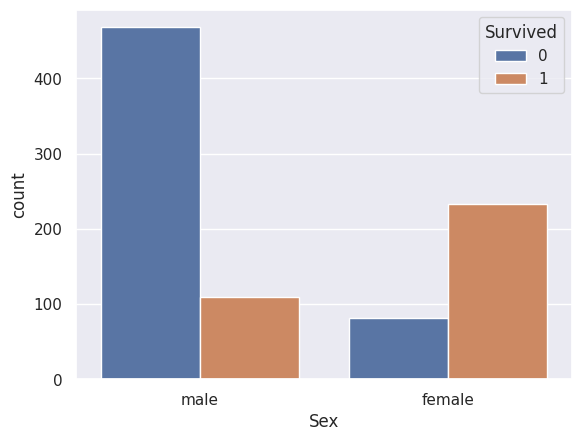

In [62]:
sns.countplot(x='Sex', hue='Survived', data=dataset)

<Axes: xlabel='SibSp', ylabel='count'>

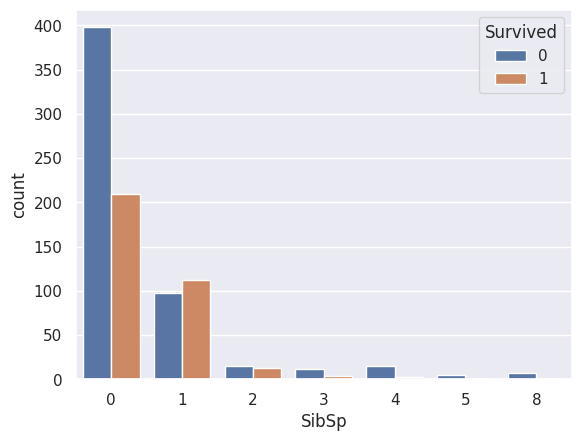

In [63]:
sns.countplot(x='SibSp', hue='Survived', data=dataset)

<Axes: xlabel='Parch', ylabel='count'>

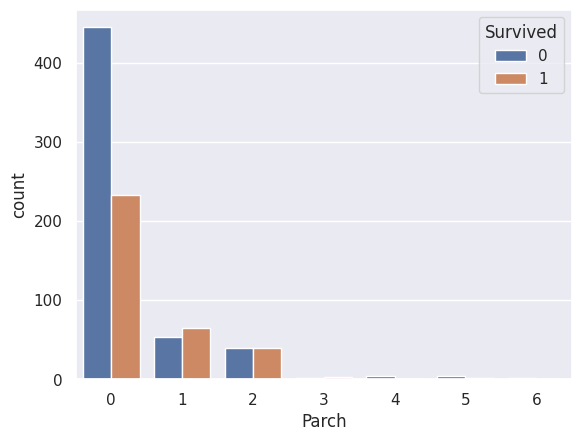

In [64]:
sns.countplot(x='Parch', hue='Survived', data=dataset)

<Axes: xlabel='Age', ylabel='count'>

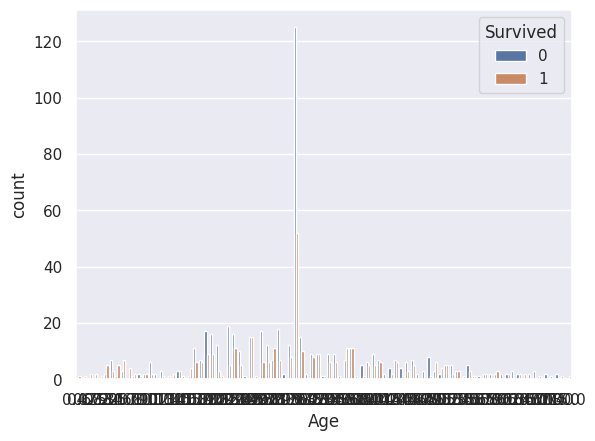

In [65]:
sns.countplot(x='Age', hue='Survived', data=dataset)

Data Preprocessing

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
dataset['Sex'] = le.fit_transform(dataset['Sex'])

In [71]:
dataset['Embarked'] = le.fit_transform(dataset['Embarked'])

In [72]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


Splitting X(features) and y(target)

In [74]:
X = dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]


In [75]:
y = dataset[['Survived']]

In [122]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [105]:
X_train.shape

(668, 6)

In [106]:
X_test.shape

(223, 6)

In [107]:
y_train.shape

(668, 1)

In [108]:
y_test.shape

(223, 1)

Training the model

In [132]:
def classify(model):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
  model.fit(X_train, y_train)
  print("Accuracy : ", model.score(X_test, y_test))
  score = cross_val_score(model, X, y)
  print("CV : ", np.mean(score))

In [133]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [134]:
classify(model)

Accuracy :  0.7488789237668162
CV :  0.7889962965287804


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy on test data

In [116]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0])

In [117]:
model.score(X_test, y_test)

0.820627802690583

Using Decision Tree model


In [138]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [139]:
classify(model)

Accuracy :  0.8295964125560538
CV :  0.7913062582386542


Using Random Forest Model

In [140]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [141]:
classify(model)

<ipython-input-132-c15b704a2c62>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy :  0.7847533632286996


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

CV :  0.8014060636494886
